In [ ]:

from bs4 import BeautifulSoup
import requests


In [ ]:

def get_r_bloggers(page):
    url = f"https://www.r-bloggers.com/page/{page}/"
    print(f"Downloading {url}")
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    titles = []
    h3_list = soup.find_all('h3')
    for h3 in h3_list:
        titles.append(h3.text)
    return titles

In [ ]:
titles = []
for page in range(1, 11):
    titles.extend(get_r_bloggers(page))
titles = [t.lower() for t in titles]


['map and nested lists',
 'situation',
 'mozart’s emotions and creativity: statistical analysis of composers’ letters and output.',
 'speed up data analytics and wrangling with parquet files',
 'rss, fantastic tool for keeping up-to-date',
 'painting tails',
 'free webinar: statistical model diagnostics and validation techniques using r',
 'eoda is hiring system engineers from germany',
 'let the flashlight shine with plotly',
 'r for seo part 3: data visualisation with ggplot2 & wordcloud',
 'rstudio community table gallery',
 'using shiny to create an academic poster',
 'don’t panic! a scientific approach to debugging production failure',
 '4 new books and a new finance chapter added to big book of r',
 'new features in {overviewr}',
 'parallelly 1.31.1: better at inferring number of cpu cores with cgroups and linux containers',
 'forecasting yield curves using dynamic nelson-siegel model with r code',
 'where for (loop) art thou?',
 'iterating over the rows of a data.frame with purr

In [ ]:
!pip install wordcloud nltk 

In [ ]:
import nltk

nltk.download('punkt')
nltk.download("stopwords")

def get_words(text):
    text = text.lower().strip()
    tokens = nltk.word_tokenize(text)
    words  = [token for token in tokens if token.isalpha()]
    return ' '.join(words)

titles = [get_words(t) for t in titles]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


(-0.5, 799.5, 799.5, -0.5)

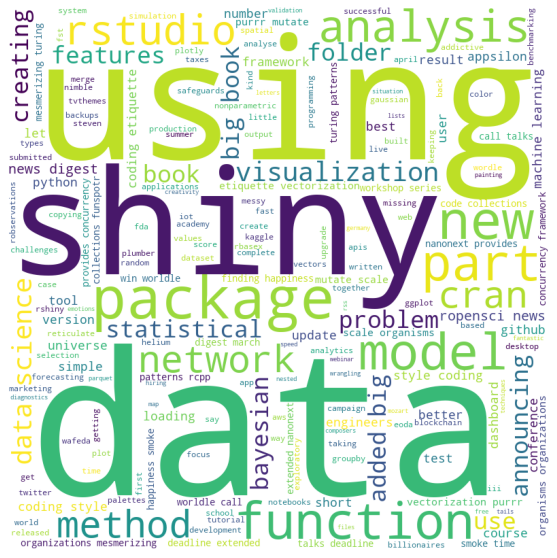

In [ ]:
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
stopwords_en = nltk.corpus.stopwords.words("english")
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
wordcloud = WordCloud(stopwords=stopwords_en,
                      height=800,
                      background_color="white",
                     width=800).generate(' '.join(titles))
ax.imshow(wordcloud)
ax.axis("off")

In [ ]:
def get_r_bloggers_links(page):
    url = f"https://www.r-bloggers.com/page/{page}/"
    print(f"Downloading {url}")
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    links = []
    h3_list = soup.find_all('h3')
    for h3 in h3_list:
        links.append(h3.a.attrs['href'])
    return links
links = []
for page in range(1, 10):
    links.extend(get_r_bloggers_links(page))

In [ ]:
!pip install newspaper3k

     |████████████████████████████████| 211 kB 8.6 MB/s 
     |████████████████████████████████| 81 kB 10.0 MB/s 
     |████████████████████████████████| 7.4 MB 30.8 MB/s 
     |████████████████████████████████| 87 kB 6.4 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13553 sha256=c2467207e532964576de5bbd464b789f588f28a830ef51003c2a9bd454014861
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3357 sha256=cb5b72c1c866abc3cafda33a099c8aa35ffa579cce4f6923434e4f874d5b7a26
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398404 sha256=41b3e1dbe58c479dafae507c5d21bdfa2d7222a17bee8157f38ecd34b06416ed
  Stored in directory: /root/.cache/pip/wheels/4c/91/46/3c208287b726df325a59795743

In [ ]:
from newspaper import Article

In [ ]:
import time
def get_texts(url):
    try:
        article = Article(url)
        article.download()
        article.parse()
        text = article.text
    except:
        text = ""
    time.sleep(1)
    return text

texts = [get_texts(url) for url in links]

(-0.5, 799.5, 799.5, -0.5)

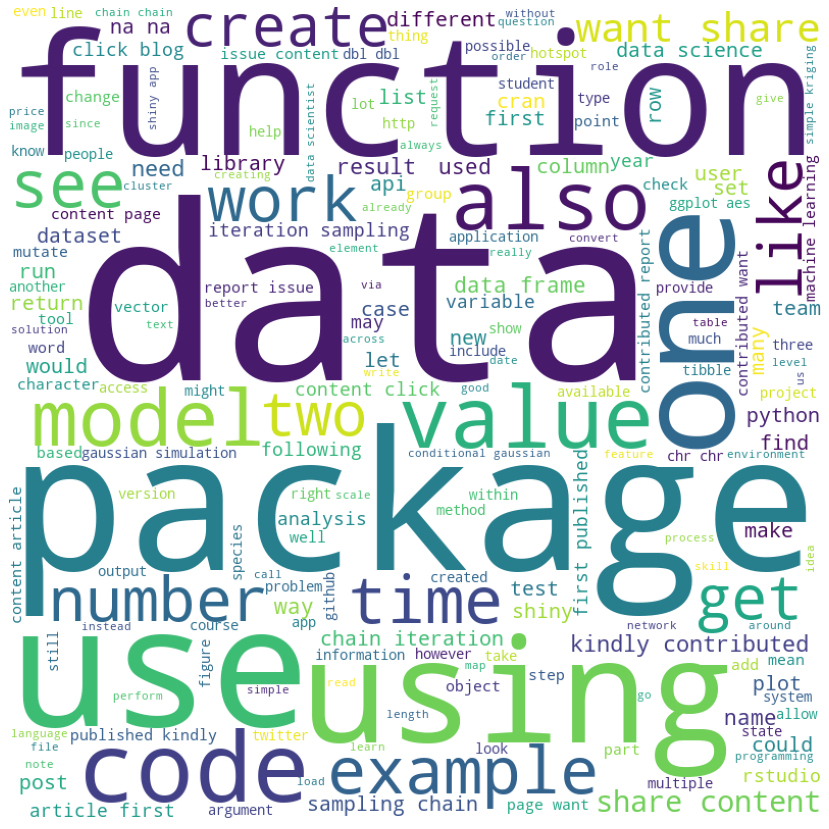

In [ ]:
texts = [get_words(t) for t in texts if t != ""]

fig, ax = plt.subplots(1, 1, figsize=(15, 15))
wordcloud = WordCloud(stopwords=stopwords_en,
                      height=800,
                      background_color="white",
                     width=800).generate(' '.join(texts))
ax.imshow(wordcloud)
ax.axis("off")

In [ ]:
len(texts)

180